In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [6]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())
"""
because when the MNIST dataset is first instantiated with download=True, it downloads the necessary files for both training and test sets into the specified root directory
"""

100%|██████████| 9.91M/9.91M [00:03<00:00, 2.59MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 266kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 1.99MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.88MB/s]


'\nbecause when the MNIST dataset is first instantiated with download=True, it downloads the necessary files for both training and test sets into the specified root directory\n'

In [7]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(train_loader)
example_data, example_targets = next(examples)
print(example_data.shape, example_targets.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


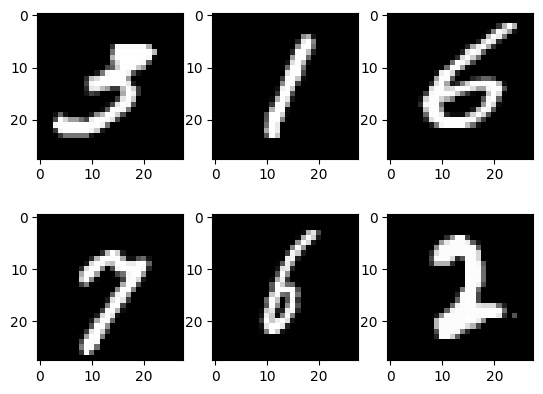

In [8]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [12]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [13]:
model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [14]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/2], Step [100/600], Loss: 0.3893
Epoch [1/2], Step [200/600], Loss: 0.2763
Epoch [1/2], Step [300/600], Loss: 0.3128
Epoch [1/2], Step [400/600], Loss: 0.1560
Epoch [1/2], Step [500/600], Loss: 0.1567
Epoch [1/2], Step [600/600], Loss: 0.1177
Epoch [2/2], Step [100/600], Loss: 0.1262
Epoch [2/2], Step [200/600], Loss: 0.1242
Epoch [2/2], Step [300/600], Loss: 0.0839
Epoch [2/2], Step [400/600], Loss: 0.0743
Epoch [2/2], Step [500/600], Loss: 0.0975
Epoch [2/2], Step [600/600], Loss: 0.0579


In [15]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.21 %
